In [1]:
# set root directory
import os

os.chdir('../')
os.getcwd()

'c:\\Users\\HP\\Desktop\\clustering-moroccan-weather-data'

In [2]:
# imports
import numpy as np
import pandas as pd

In [3]:
# imports for plots
from plotly import graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.io as pio

pio.templates.default = "plotly_white"

In [4]:
# load data
# weather variables to use
selected_cols = ["cumulative_GDD", "cumulative_PREC", "cumulative_RH2M", "cumulative_WS2M"]

dict_data = {}

for col in selected_cols:
  pathname = f"processed_data/{col}.csv"

  dict_data[col] = pd.read_csv(pathname, index_col=0)

In [5]:
# standarize
dict_standarized_data = {}

for col in selected_cols:
  # select data
  data = dict_data[col].copy()

  # scale data
  max_val = np.max(data.values)
  min_val = np.min(data.values)
  data = (data - min_val) / (max_val - min_val)

  # standarize each var
  for var in dict_data[col]:
    data[var] = (data[var] - data[var].mean())

  dict_standarized_data[col] = data

In [6]:
dict_standarized_data["cumulative_GDD"]

,0,1,2,3,4,5,6,7,8,9,...,259,260,261,262,263,264,265,266,267,268
1982,0.001236,0.001883,0.002356,0.003464,0.004948,0.006110,0.006680,0.006812,0.007366,0.007407,...,0.029620,0.029415,0.028067,0.026912,0.026031,0.025633,0.025509,0.025052,0.024873,0.025203
1983,-0.000221,-0.000584,-0.001011,-0.001775,-0.002860,-0.003957,-0.005151,-0.006008,-0.006958,-0.008138,...,-0.028586,-0.028997,-0.029663,-0.030352,-0.030979,-0.031642,-0.032518,-0.033328,-0.034135,-0.034596
1984,0.000437,0.000632,0.000638,0.001049,0.001807,0.002751,0.003728,0.004395,0.004634,0.004442,...,-0.030960,-0.031068,-0.030611,-0.030098,-0.029357,-0.028411,-0.027674,-0.026831,-0.026457,-0.025976
1985,0.000343,0.000486,0.000507,0.000414,-0.000039,-0.000584,-0.001138,-0.001064,-0.000546,0.000233,...,-0.012287,-0.012972,-0.013679,-0.013525,-0.013004,-0.012474,-0.011179,-0.010723,-0.010685,-0.010720
1986,0.001100,0.001815,0.002458,0.002960,0.003211,0.003571,0.004173,0.004901,0.005342,0.005823,...,-0.026197,-0.026155,-0.025881,-0.025365,-0.024856,-0.024323,-0.023765,-0.023344,-0.022702,-0.022228
1987,-0.000413,-0.000672,-0.001309,-0.002018,-0.002511,-0.002336,-0.001905,-0.001550,-0.001670,-0.001949,...,0.015612,0.016184,0.016988,0.017086,0.016461,0.016189,0.016397,0.016946,0.016928,0.016441
1988,0.000074,-0.000430,-0.000600,-0.000410,-0.000487,-0.001002,-0.001558,-0.001688,-0.001665,-0.002016,...,-0.033421,-0.034079,-0.034780,-0.035587,-0.036572,-0.037473,-0.038059,-0.038360,-0.038356,-0.037469
1989,-0.000798,-0.001662,-0.002544,-0.003060,-0.003676,-0.004203,-0.004183,-0.003978,-0.003686,-0.003168,...,-0.009386,-0.009058,-0.009234,-0.009918,-0.010516,-0.011098,-0.011591,-0.012132,-0.012443,-0.012499
1990,-0.000348,-0.000405,-0.000176,0.000285,0.000548,0.000949,0.001694,0.002487,0.003121,0.004072,...,0.025585,0.025470,0.025768,0.026153,0.026594,0.026815,0.027116,0.027876,0.028628,0.029219
1991,0.000121,0.000281,0.000150,-0.000019,-0.000199,-0.000264,-0.000318,-0.000863,-0.001328,-0.001801,...,-0.051035,-0.050742,-0.050902,-0.051320,-0.052153,-0.053174,-0.053672,-0.053432,-0.052493,-0.051514


In [7]:
# from PCA time dimension univariate
# cumulative GDD: n_components = 6
# cumulative PREC: n_components = 7

from sklearn.decomposition import PCA


arr_nb_PC = [6, 7, 8, 8]

# where to store pca
dict_pca = {}
# where to store transformed data
dict_transformed_data = {}

# loop over weather vars
for col, n in zip(selected_cols, arr_nb_PC):
  # build pca
  pca = PCA(n_components=n)
  pca.fit(dict_standarized_data[col])

  dict_pca[col] = pca

  # transform data
  dict_transformed_data[col] = pd.DataFrame(pca.transform(dict_standarized_data[col]), index=dict_standarized_data[col].index)

In [8]:
dict_transformed_data["cumulative_PREC"]

,0,1,2,3,4,5,6
1982,0.812141,1.136826,0.129547,0.345353,-0.323735,0.168523,-0.012214
1983,-0.910387,-0.147130,-0.133312,-0.190738,0.109870,0.077318,-0.116758
1984,-0.928302,0.074417,0.357072,0.344728,-0.070567,0.098591,-0.133753
1985,-2.238344,-0.122822,-0.065576,0.024352,-0.122032,0.077975,-0.044037
1986,-0.784248,0.591180,-0.243686,-0.227761,0.028401,0.080321,0.022401
1987,-0.452177,0.272239,-0.649210,-0.451154,-0.053178,0.335993,0.101851
1988,-0.389397,-0.256088,-0.206053,0.043563,0.049590,0.055931,-0.026695
1989,-1.084296,0.383333,0.447291,-0.040193,0.069586,-0.017241,0.122396
1990,0.249123,-0.233962,0.195605,0.361649,-0.056396,-0.047524,0.032640
1991,0.650892,0.261396,0.087650,-0.162111,0.384414,-0.068947,-0.009645


In [9]:
# join two data sets
merged_data = dict_transformed_data["cumulative_GDD"].join(dict_transformed_data["cumulative_PREC"], rsuffix='_other')

merged_data

,0,1,2,3,4,5,0_other,1_other,2_other,3_other,4_other,5_other,6
1982,-0.540850,0.173390,0.028654,0.001792,0.013997,0.001309,0.812141,1.136826,0.129547,0.345353,-0.323735,0.168523,-0.012214
1983,0.381457,-0.085105,-0.099465,-0.015467,0.032633,-0.021586,-0.910387,-0.147130,-0.133312,-0.190738,0.109870,0.077318,-0.116758
1984,-0.000347,0.242637,-0.015333,-0.039806,-0.014838,-0.048626,-0.928302,0.074417,0.357072,0.344728,-0.070567,0.098591,-0.133753
1985,0.053186,0.058591,-0.033073,-0.013999,-0.001337,-0.023563,-2.238344,-0.122822,-0.065576,0.024352,-0.122032,0.077975,-0.044037
1986,0.167989,0.164612,0.067081,0.022486,0.031901,0.060061,-0.784248,0.591180,-0.243686,-0.227761,0.028401,0.080321,0.022401
1987,-0.067384,-0.115074,-0.010171,-0.030884,-0.005195,-0.001371,-0.452177,0.272239,-0.649210,-0.451154,-0.053178,0.335993,0.101851
1988,0.167591,0.072444,-0.063996,-0.021009,-0.039865,-0.000065,-0.389397,-0.256088,-0.206053,0.043563,0.049590,0.055931,-0.026695
1989,0.030202,0.081692,-0.026074,-0.015475,0.047096,0.019511,-1.084296,0.383333,0.447291,-0.040193,0.069586,-0.017241,0.122396
1990,-0.388380,-0.001882,-0.037959,-0.019341,0.021840,0.011753,0.249123,-0.233962,0.195605,0.361649,-0.056396,-0.047524,0.032640
1991,0.555144,0.155271,0.027162,0.036704,0.011371,-0.003690,0.650892,0.261396,0.087650,-0.162111,0.384414,-0.068947,-0.009645


In [10]:
# params
metric = "euclidean"
linkage_method = "ward"

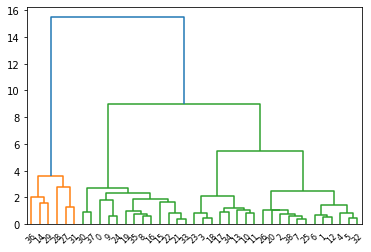

In [11]:
# clustering
# dendrogram to have an idea about aggregation procedure
# and the evolution between cluster distance

from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt

Z = linkage(merged_data, metric=metric, method=linkage_method)
# fig = plt.figure(figsize=(25, 10))
dn = dendrogram(Z)

In [12]:
# use Calanski-Harabasz index
# to choose the right number of cluster

from sklearn.cluster import AgglomerativeClustering
from sklearn import metrics


# where to store CH index
arr_calanski = {}

# max possible number of cluster
max_k = 10

# data
X = merged_data

# loop over number of clusters
for k in range(2, max_k):
  # build model 
  model = AgglomerativeClustering(n_clusters=k, linkage=linkage_method, affinity=metric)
  model = model.fit(X)

  # clusters label
  labels = model.fit_predict(X)

  # compute calanski metric
  m = metrics.calinski_harabasz_score(X, labels)

  arr_calanski[k] = m


# plot of CH index
fig = go.Figure(data=[
                      go.Scatter(x=list(arr_calanski.keys()), y=list(arr_calanski.values()))
])

fig.update_layout(
    width=800,
    height=500,
    xaxis_title="number of cluster",
    yaxis_title="Calanski-Harbasz index"
)

fig.show()

In [13]:
from sklearn.cluster import AgglomerativeClustering

X = merged_data
model = AgglomerativeClustering(n_clusters=4, linkage=linkage_method, affinity=metric)
model = model.fit(X)

labels = model.fit_predict(X)

labels

array([2, 1, 1, 3, 1, 1, 1, 1, 2, 2, 3, 3, 1, 3, 0, 2, 2, 3, 3, 2, 1, 2,
       2, 3, 2, 1, 1, 0, 0, 0, 2, 0, 1, 2, 3, 2, 0, 2, 1], dtype=int64)

In [14]:
dict_crop_years = { f"cluster_{i}": [] for i in range(4) }

for year, label in zip(range(1982, 1982 + 39), labels):
  dict_crop_years[f"cluster_{label}"].append(year)

In [15]:
dict_crop_years

{'cluster_0': [1996, 2009, 2010, 2011, 2013, 2018],
 'cluster_1': [1983,
  1984,
  1986,
  1987,
  1988,
  1989,
  1994,
  2002,
  2007,
  2008,
  2014,
  2020],
 'cluster_2': [1982,
  1990,
  1991,
  1997,
  1998,
  2001,
  2003,
  2004,
  2006,
  2012,
  2015,
  2017,
  2019],
 'cluster_3': [1985, 1992, 1993, 1995, 1999, 2000, 2005, 2016]}